
# **Importing the Libraries**

In [124]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from os.path import isfile, join
import matplotlib.pyplot as plt
import tensorflow as tf
from os import listdir
import pandas as pd
import numpy as np


# **Part 1 - Data Preprocessing**


## **Preprocessing the Training set**

In [125]:
#Para evitar el overfitting, se deben realizar diversos cambios con el conjunto de datos, para ello se aplica
#la estandarización de los datos, rango de corte, rango de zoom y rotaciones horizontales.
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

training_set = train_datagen.flow_from_directory(
    #Directorio del conjunto de entrenamiento.
    'dataset/train',
    #Tamaño final de las imágenes parala entrada del modelo (uniformidad de tamaños)
    target_size=(64, 64),
    #El tamaño de las imágenes que queremos tener en cada lote.
    batch_size=32,
    class_mode='binary')

Found 557 images belonging to 2 classes.



## **Preprocessing the Test set**

In [126]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary',)

Found 140 images belonging to 2 classes.


## **Visualizing Data Augmentation**

In [127]:
def viewData(datagen, title):
    pic = datagen.flow(img_tensor, batch_size =1)
    plt.figure(figsize=(10,8))
    #Plots our figures
    for i in range(1,5):
      plt.subplot(1, 4, i)
      batch = pic.next()
      image_ = batch[0].astype('uint8')
      plt.title(title)
      plt.imshow(image_)

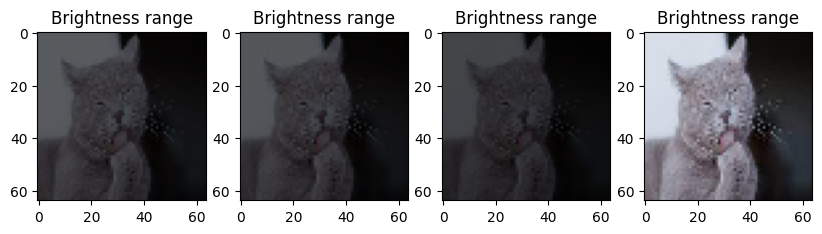

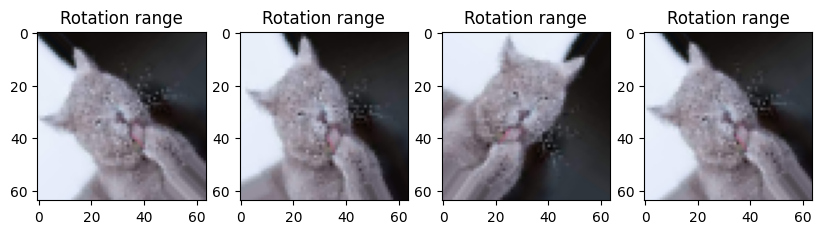

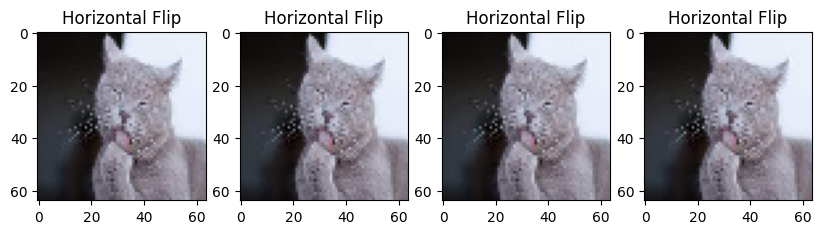

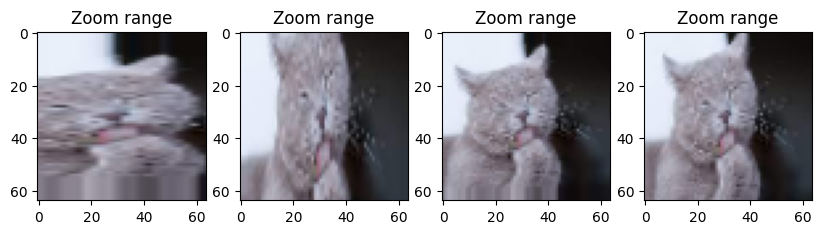

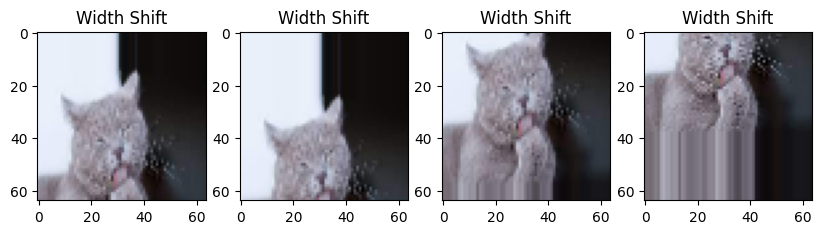

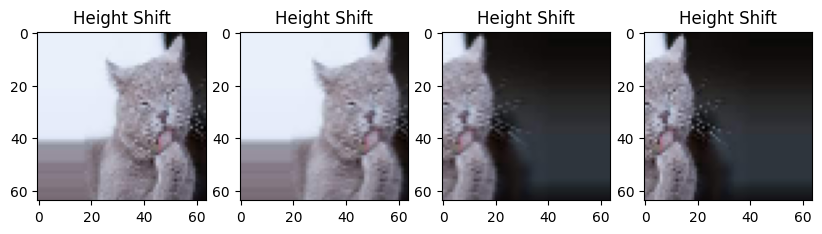

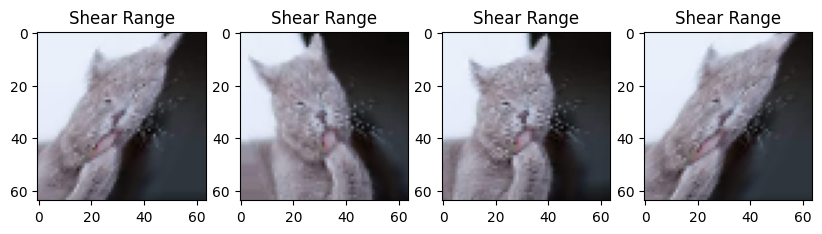

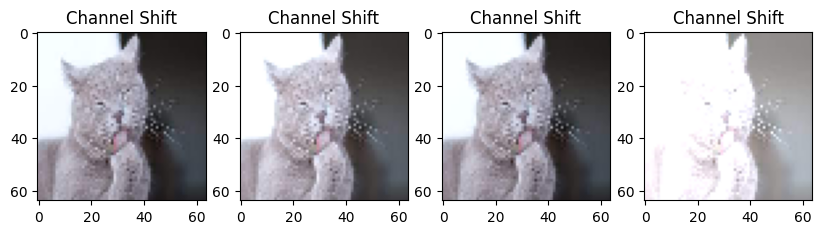

In [128]:
image_path = 'dataset/train/cats/cat_100.jpg'

img = tf.keras.preprocessing.image.load_img(image_path, target_size= (64,64))
img_tensor = tf.keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)


datagen = ImageDataGenerator(brightness_range=[0.2, 1.0])
viewData(datagen, 'Brightness range')

datagen = ImageDataGenerator(rotation_range=60)
viewData(datagen, 'Rotation range')

datagen = ImageDataGenerator(horizontal_flip=True)
viewData(datagen, 'Horizontal Flip')

datagen = ImageDataGenerator(zoom_range=[0.3, 1.5])
viewData(datagen, 'Zoom range')

datagen = ImageDataGenerator(width_shift_range=0.5)
viewData(datagen, 'Width Shift')

datagen = ImageDataGenerator(height_shift_range=0.5)
viewData(datagen, 'Height Shift')

datagen = ImageDataGenerator(shear_range=45.0)
viewData(datagen, 'Shear Range')

datagen = ImageDataGenerator(channel_shift_range=150.0)
viewData(datagen, 'Channel Shift')

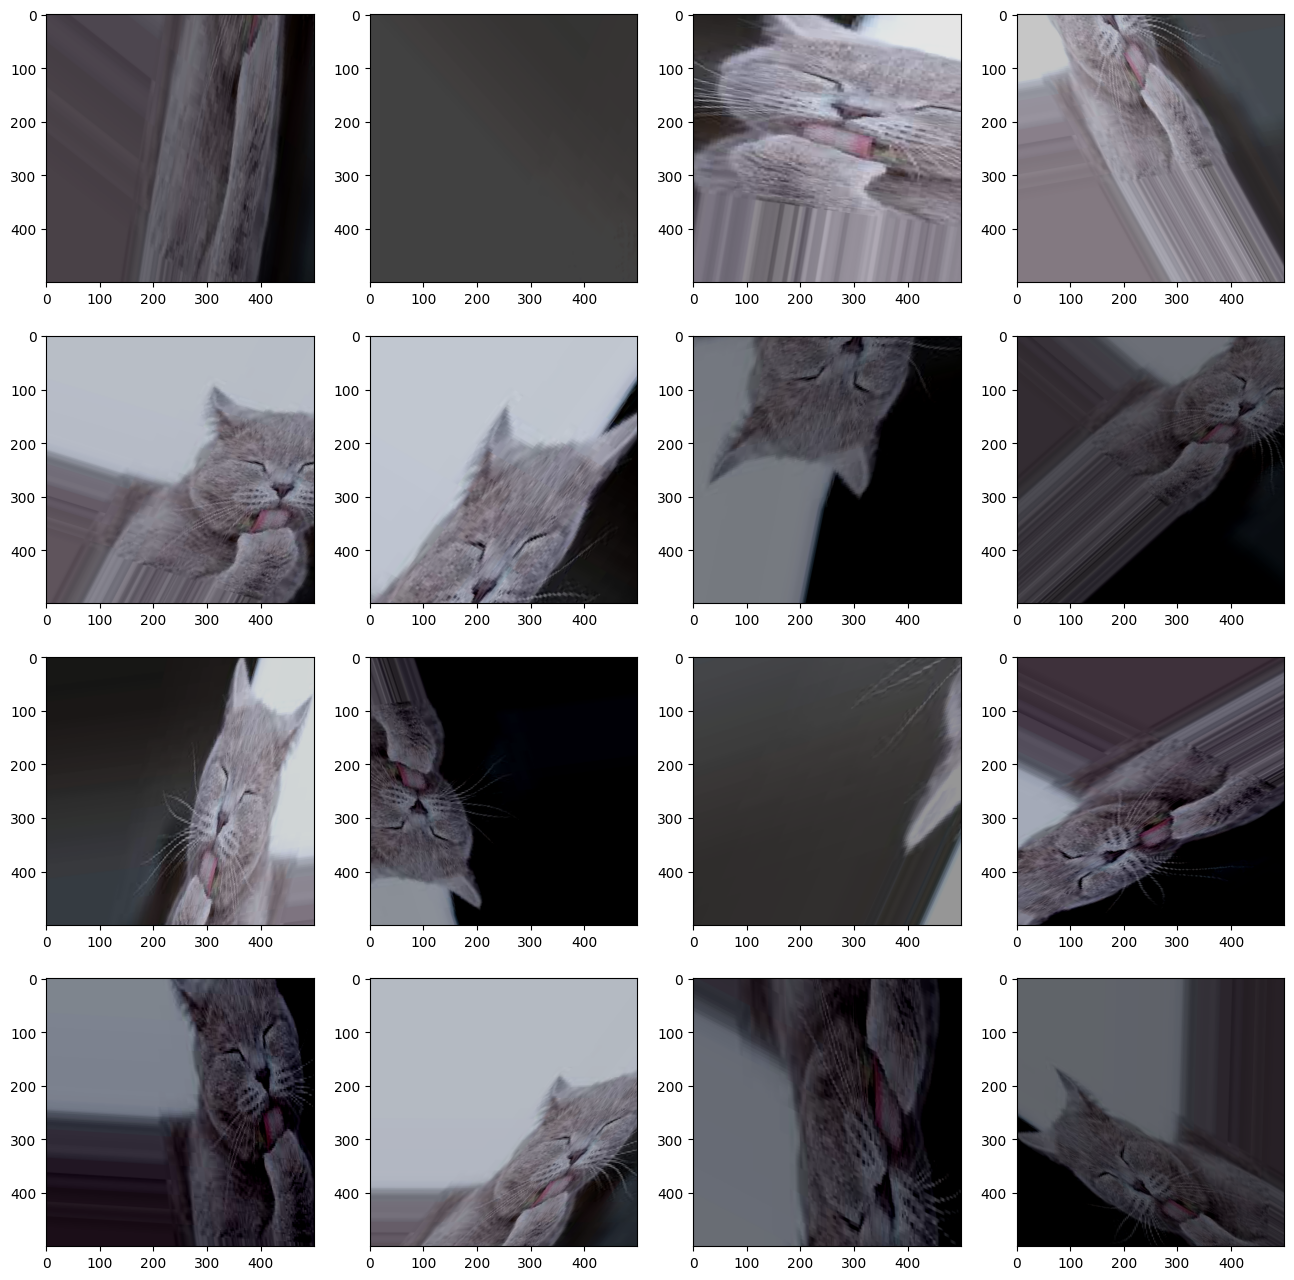

In [129]:
img = tf.keras.preprocessing.image.load_img(image_path, target_size= (500,500))
img_tensor = tf.keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
#Uses ImageDataGenerator to flip the images
datagen = ImageDataGenerator(brightness_range=[0.5, 1.0],
                             rotation_range=60,
                             horizontal_flip=True,
                             vertical_flip=True,
                             zoom_range=[0.3, 1.5],
                             width_shift_range=0.5,
                             height_shift_range=0.5,
                             shear_range=45.0,
                             channel_shift_range=100.0
                            )
#Creates our batch of one image
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(16, 16))
#Plots our figures
for i in range(1,17):
   plt.subplot(4, 4, i)
   batch = pic.next()
   image_ = batch[0].astype('uint8')
   plt.imshow(image_)
plt.show()

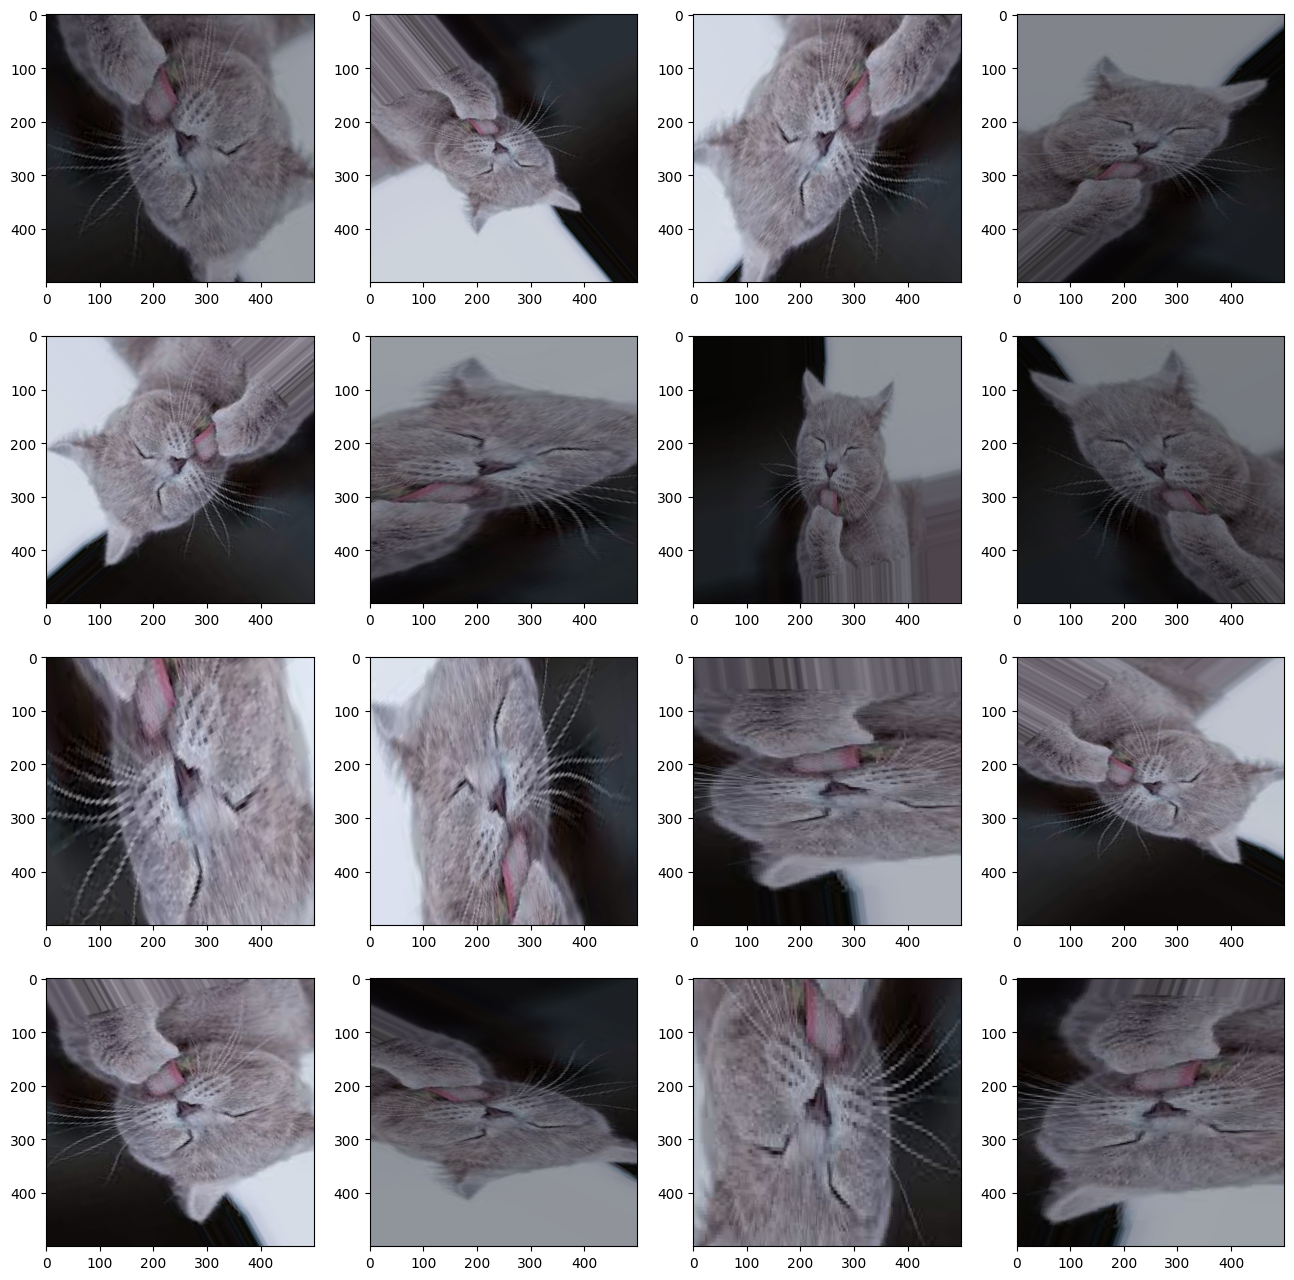

In [130]:
img = tf.keras.preprocessing.image.load_img(image_path, target_size= (500,500))
img_tensor = tf.keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
#Uses ImageDataGenerator to flip the images
datagen = ImageDataGenerator(brightness_range=[0.5, 1.0],
                             rotation_range=60,
                             horizontal_flip=True,
                             vertical_flip=True,
                             zoom_range=[0.3, 1.5],
                             shear_range=10.0,
                            )
#Creates our batch of one image
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(16, 16))
#Plots our figures
for i in range(1,17):
   plt.subplot(4, 4, i)
   batch = pic.next()
   image_ = batch[0].astype('uint8')
   plt.imshow(image_)
plt.show()


# **Part 2 - Building the CNN**


## **Initialising the CNN**

In [131]:
cnn = tf.keras.models.Sequential()


## **Convolution and Pooling**

In [132]:
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


## **Flattening**

In [133]:
cnn.add(tf.keras.layers.Flatten())


## **Denses and Output layers**

In [134]:
from tensorflow.keras.optimizers.legacy import Adam
adam = Adam()

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
#cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
cnn.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])


# **Part 3 - Training the CNN**

In [136]:
history = cnn.fit(x=training_set, validation_data=test_set, epochs=100)

Epoch 1/100
18/18 [==============================] - 5s 256ms/step - loss: 0.5087 - accuracy: 0.7558 - val_loss: 0.6962 - val_accuracy: 0.6071
Epoch 2/100
18/18 [==============================] - 5s 259ms/step - loss: 0.4847 - accuracy: 0.7666 - val_loss: 0.6941 - val_accuracy: 0.6714
Epoch 3/100
18/18 [==============================] - 5s 260ms/step - loss: 0.4770 - accuracy: 0.7702 - val_loss: 0.6971 - val_accuracy: 0.6071
Epoch 4/100
18/18 [==============================] - 5s 259ms/step - loss: 0.4505 - accuracy: 0.7756 - val_loss: 0.6713 - val_accuracy: 0.6357
Epoch 5/100
18/18 [==============================] - 5s 246ms/step - loss: 0.4515 - accuracy: 0.7666 - val_loss: 0.7537 - val_accuracy: 0.6786
Epoch 6/100
18/18 [==============================] - 5s 255ms/step - loss: 0.4721 - accuracy: 0.7612 - val_loss: 0.6964 - val_accuracy: 0.6357
Epoch 7/100
18/18 [==============================] - 5s 255ms/step - loss: 0.4749 - accuracy: 0.7738 - val_loss: 0.6736 - val_accuracy: 0.6643

In [148]:
model_json = cnn.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
cnn.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk



# **Part 4 - Predictions**


## **Simple prediction**

In [137]:
test_image = tf.keras.preprocessing.image.load_img('dataset/single_prediction/54D085DA-C444-4673-A4EE-92FB66BDD10B_1_105_c.jpeg', target_size=(64,64))
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image/255.0)
training_set.class_indices
if result[0][0] > 0.5:
    prediction = 'Perro'
else: 
    prediction = 'Gato'
print(prediction)


FileNotFoundError: [Errno 2] No such file or directory: 'dataset/single_prediction/54D085DA-C444-4673-A4EE-92FB66BDD10B_1_105_c.jpeg'


## **Female batch test**

In [145]:
Gatos_test = [f for f in listdir('dataset/test/cats/') if isfile(join('dataset/test/cats', f))]
accuracyGatos = np.zeros(len(Gatos_test))
umbral = np.zeros(len(Gatos_test))

for i in range(len(Gatos_test)):
    path = 'dataset/test/cats/' + Gatos_test[i]
    test_image = tf.keras.preprocessing.image.load_img(path, target_size=(64,64))
    test_image = tf.keras.preprocessing.image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    result     = cnn.predict(test_image/255.0)
    training_set.class_indices
    umbral[i]  = result
    if result[0][0] > 0.5:
        prediction = 'Perro'
        accuracyGatos[i] = 0
    else: 
        prediction = 'Gato'
        accuracyGatos[i] = 1
    print(prediction)

umbralF = pd.Series(umbral)
print(umbralF.describe)    

print(np.mean(accuracyGatos))

1/1 [==============================] - 0s 13ms/step
Gato
1/1 [==============================] - 0s 14ms/step
Gato
1/1 [==============================] - 0s 15ms/step
Gato
1/1 [==============================] - 0s 13ms/step
Perro
1/1 [==============================] - 0s 14ms/step
Gato
1/1 [==============================] - 0s 13ms/step
Gato
1/1 [==============================] - 0s 14ms/step
Gato
1/1 [==============================] - 0s 12ms/step
Gato
1/1 [==============================] - 0s 12ms/step
Gato
1/1 [==============================] - 0s 19ms/step
Gato
1/1 [==============================] - 0s 14ms/step
Gato
1/1 [==============================] - 0s 14ms/step
Gato
1/1 [==============================] - 0s 13ms/step
Gato
1/1 [==============================] - 0s 12ms/step
Gato
1/1 [==============================] - 0s 13ms/step
Gato
1/1 [==============================] - 0s 14ms/step
Gato
1/1 [==============================] - 0s 14ms/step
Perro
1/1 [========================

In [144]:
Gatos_test = [f for f in listdir('dataset/single_prediction/dogs/') if isfile(join('dataset/single_prediction/dogs/', f))]
accuracyGatos = np.zeros(len(Gatos_test))
umbral = np.zeros(len(Gatos_test))

for i in range(len(Gatos_test)):
    path = 'dataset/single_prediction/dogs/' + Gatos_test[i]
    test_image = tf.keras.preprocessing.image.load_img(path, target_size=(64,64))
    test_image = tf.keras.preprocessing.image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    result     = cnn.predict(test_image/255.0)
    training_set.class_indices
    umbral[i]  = result
    if result[0][0] > 0.5:
        prediction = 'Perro'
        accuracyGatos[i] = 0
    else: 
        prediction = 'Gato'
        accuracyGatos[i] = 1
    print(path, prediction)

umbralF = pd.Series(umbral)
print(umbralF.describe)    

print(np.mean(accuracyGatos))

1/1 [==============================] - 0s 18ms/step
dataset/single_prediction/dogs/C37AE3F3-E926-4BDB-AEB5-874A7D992B88_1_105_c.jpeg Gato
1/1 [==============================] - 0s 14ms/step
dataset/single_prediction/dogs/35B17A36-0BD3-490E-82A0-1B481382CC8F_1_105_c.jpeg Perro
1/1 [==============================] - 0s 12ms/step
dataset/single_prediction/dogs/12917F91-E813-439F-AF48-B4079FF9A686.jpeg Gato
1/1 [==============================] - 0s 13ms/step
dataset/single_prediction/dogs/671CC605-57E3-429B-97DB-A56197F8345E_1_102_o.jpeg Gato
1/1 [==============================] - 0s 12ms/step
dataset/single_prediction/dogs/C38DC701-4F7F-408A-8AE2-ABB7F93E2EC7.jpeg Perro
1/1 [==============================] - 0s 14ms/step
dataset/single_prediction/dogs/80977CB9-0B48-4054-A6E5-0E063A08FCA3_1_105_c.jpeg Perro
1/1 [==============================] - 0s 14ms/step
dataset/single_prediction/dogs/79C179B0-C5D4-4B62-8203-FC8871D68253.jpeg Gato
1/1 [==============================] - 0s 14ms/step
dat

In [146]:
Gatos_test = [f for f in listdir('dataset/single_prediction/cats/') if isfile(join('dataset/single_prediction/cats/', f))]
accuracyGatos = np.zeros(len(Gatos_test))
umbral = np.zeros(len(Gatos_test))

for i in range(len(Gatos_test)):
    path = 'dataset/single_prediction/cats/' + Gatos_test[i]
    test_image = tf.keras.preprocessing.image.load_img(path, target_size=(64,64))
    test_image = tf.keras.preprocessing.image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    result     = cnn.predict(test_image/255.0)
    training_set.class_indices
    umbral[i]  = result
    if result[0][0] > 0.5:
        prediction = 'Perro'
        accuracyGatos[i] = 0
    else: 
        prediction = 'Gato'
        accuracyGatos[i] = 1
    print(path, prediction)

umbralF = pd.Series(umbral)
print(umbralF.describe)    

print(np.mean(accuracyGatos))

1/1 [==============================] - 0s 15ms/step
dataset/single_prediction/cats/A7E95A60-02FC-4684-A823-E659EBDD1D1E_1_105_c.jpeg Gato
1/1 [==============================] - 0s 16ms/step
dataset/single_prediction/cats/4AFC886C-1E82-4BF4-AF5A-7432A0D0465B.jpeg Gato
1/1 [==============================] - 0s 14ms/step
dataset/single_prediction/cats/6FC50C40-096E-42E1-AE1B-55DC3F9134C5_1_105_c.jpeg Gato
1/1 [==============================] - 0s 16ms/step
dataset/single_prediction/cats/77D26B17-2844-4853-93FD-F2A318D1E30D_1_105_c.jpeg Gato
1/1 [==============================] - 0s 15ms/step
dataset/single_prediction/cats/B9649597-E824-490B-94BD-0FDDE260D9E2_1_105_c.jpeg Gato
1/1 [==============================] - 0s 15ms/step
dataset/single_prediction/cats/54D085DA-C444-4673-A4EE-92FB66BDD10B_1_105_c.jpeg Gato
1/1 [==============================] - 0s 17ms/step
dataset/single_prediction/cats/4262467D-EB8B-49DE-BB1D-231C8F2A4397_1_105_c.jpeg Gato
1/1 [==============================] - 0s 


## **Male batch test**

In [141]:
Perros_test = [f for f in listdir('dataset/test/dogs') if isfile(join('dataset/test/dogs', f))]
accuracyPerros = np.zeros(len(Perros_test))
umbral = np.zeros(len(Perros_test))

for i in range(len(Perros_test)):
    path       = 'dataset/test/dogs/' + Perros_test[i]
    test_image = tf.keras.preprocessing.image.load_img(path, target_size=(64,64))
    test_image = tf.keras.preprocessing.image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    result     = cnn.predict(test_image/255.0)
    training_set.class_indices
    umbral[i]  = result
    if result[0][0] > 0.5:
        prediction = 'Perro'
        accuracyPerros[i] = 1
    else: 
        prediction = 'Gato'
        accuracyPerros[i] = 0
    print(prediction)

umbralF = pd.Series(umbral)
print(umbralF.describe())    
print(np.mean(accuracyPerros))

1/1 [==============================] - 0s 14ms/step
Perro
1/1 [==============================] - 0s 14ms/step
Perro
1/1 [==============================] - 0s 14ms/step
Perro
1/1 [==============================] - 0s 14ms/step
Perro
1/1 [==============================] - 0s 13ms/step
Gato
1/1 [==============================] - 0s 14ms/step
Perro
1/1 [==============================] - 0s 14ms/step
Perro
1/1 [==============================] - 0s 13ms/step
Perro
1/1 [==============================] - 0s 17ms/step
Perro
1/1 [==============================] - 0s 13ms/step
Perro
1/1 [==============================] - 0s 13ms/step
Perro
1/1 [==============================] - 0s 16ms/step
Perro
1/1 [==============================] - 0s 17ms/step
Perro
1/1 [==============================] - 0s 23ms/step
Perro
1/1 [==============================] - 0s 19ms/step
Perro
1/1 [==============================] - 0s 13ms/step
Gato
1/1 [==============================] - 0s 13ms/step
Gato
1/1 [============

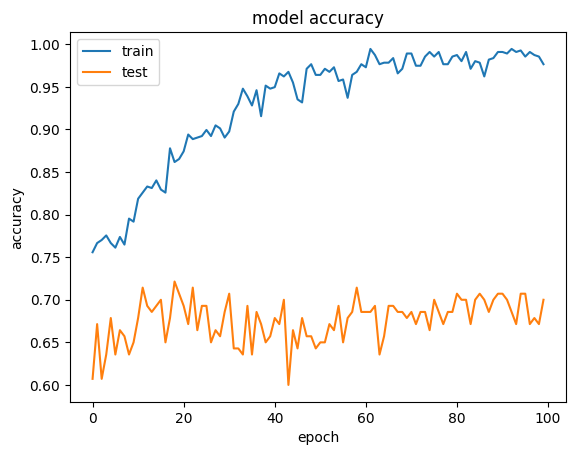

In [142]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

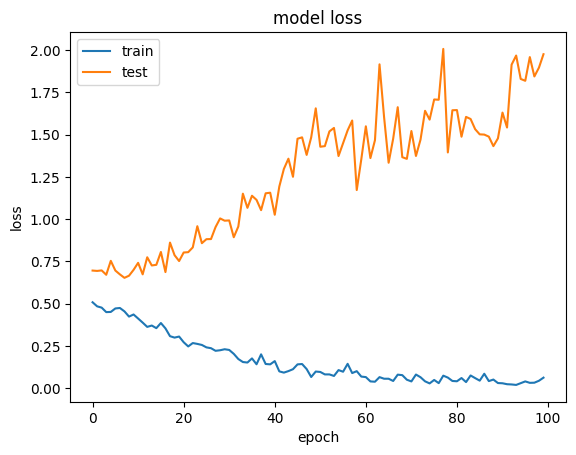

In [143]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')